In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from numpy import linalg as la
from scipy.optimize import curve_fit

# Gradient Descent in 2 Dimensions

## Derivatives and Direction
Given a function $y=f(x)$ the derivative $f^\prime(x)$ tells us the slope of the tagent line.  For example if $f(x)=3 x^4 + 4 x^3 - 39 x^22+1$ then $f^\prime(x)=12x^3 + 12x^2 - 72 x$.  When we fined $f^\prime(1)=-48$ we know that taking a step forward along the graph of the function, say $\Delta x=1$, we go down by about $\Delta y=-48$. Likewise, since $f^\prime(-1)=72$ we know that when we take a step forward along the graph of the function, again $\Delta x=1$, we will go up by about $\Delta y=72$.

In [573]:
# Function f(x)
def f(x):
    return 3*x**4 + 4*x**3 - 39*x**2+1
# Derivative of f(x)
def df(x):
    return 12*x**3 + 12*x**2 - 72*x
# Tangent line to f(x) at x=a
def ttf(x,a):
    return df(a)*(x-a)+f(a)

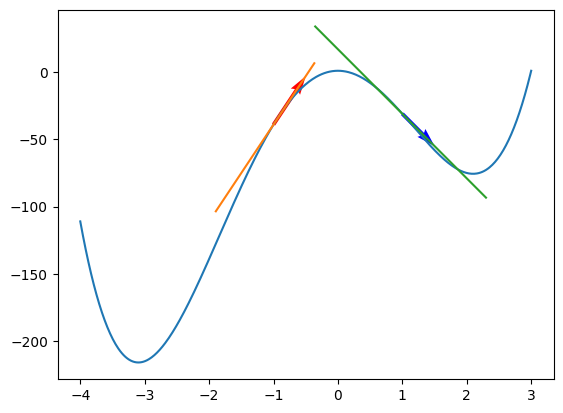

In [574]:
X = np.linspace(-4,3,500)

# Plot of f(x)
plt.plot(X,f(X))

# Plot of the tangent to f(x) at x=-1 and corresponding direction vector
plt.plot(X[150:260],ttf(X[150:260],-1))
plt.quiver(-1,f(-1),1,df(-1),angles='xy',scale_units='xy',scale=2,color='red')

# Plot of the tangent to f(x) at x=1 and corresponding direction vector
plt.plot(X[260:450],ttf(X[260:450],1))
plt.quiver(1,f(1),1,df(1),angles='xy',scale_units='xy',scale=2,color='blue')

## Finding Minimums
We can use this basic idea to find minimums of a function when it is not possible or practical to solve for the critical values.  

If the derivative, slope, is positive then moving forwatd is going up, so if we want to find the minimum value we need to go backwards.  However, if the slope is negative then the minimum is ahead of you, and you want to go forwards. So, the direction we move is always opposite in sign to the derivative:
- A ***positive*** derivative means the function is increasing and we need a ***negaive*** change in $x$ to find the minimum.
- A ***negative*** derivative means the function is decreasing and we need a ***positive*** change in $x$ to fine the minimum.

A basic Algorithm for finding the minimum might look something like:

Given a function $f(x)$ and its derivative $f^\prime(x)$:
1. Pick an initial x value $x_0$
2. Let the initial y value be $y_0=f(x_0)$
3. Pick a step size call it $dx$
4. Start a loop that stops after a fixed number of steps or when the output values stop changing significantly
    1. In the loop let $x_i = x_{i-1} - dx\cdot f^{\prime}(x_{i-1})$
    2. Then let $y_i=f(x_i)$
    3. If $x_i=x_{i-1}$, the derivative was zero and we need to adjust or $x_i$ a bit, say by $dx$ and try again.
    4. If $y_i\geq y_{i-1}$ we probably went to far, so decrease the step size and iterate again.
    5. If $y_i<y_{i-1}$ we are going in the right direction, maybe risk taking larger steps.

This is a very basic version of the ***Gradient Descent*** algorithm.

In [575]:
# Initial Values
dx = 1
xVals = [0]
yVals = [f(xVals[-1])]
i=0

# The most recent x value.
temp_x = xVals[-1]

# Loop
for i in range(200):
# Most recent y
    temp_y = f(temp_x)
# New x and y
    new_x = temp_x-dx*df(temp_x)
    new_y = f(new_x)
# Iteration step
    if new_x==temp_x: 
        temp_x += dx
    elif new_y<temp_y:
        temp_x = new_x
        dx = 1.01*dx
        xVals.append(new_x)
        yVals.append(new_y)
    else:
        dx = 0.9*dx

## Visualizing the Results
Below we can see the results of ploting the $x$ and $y$ coordinates we found at each step.  If you go back and try changing the initial values in the above loop you will see that if/or how fast we find the minimum varies greatly.  They also effect which minimum we find.

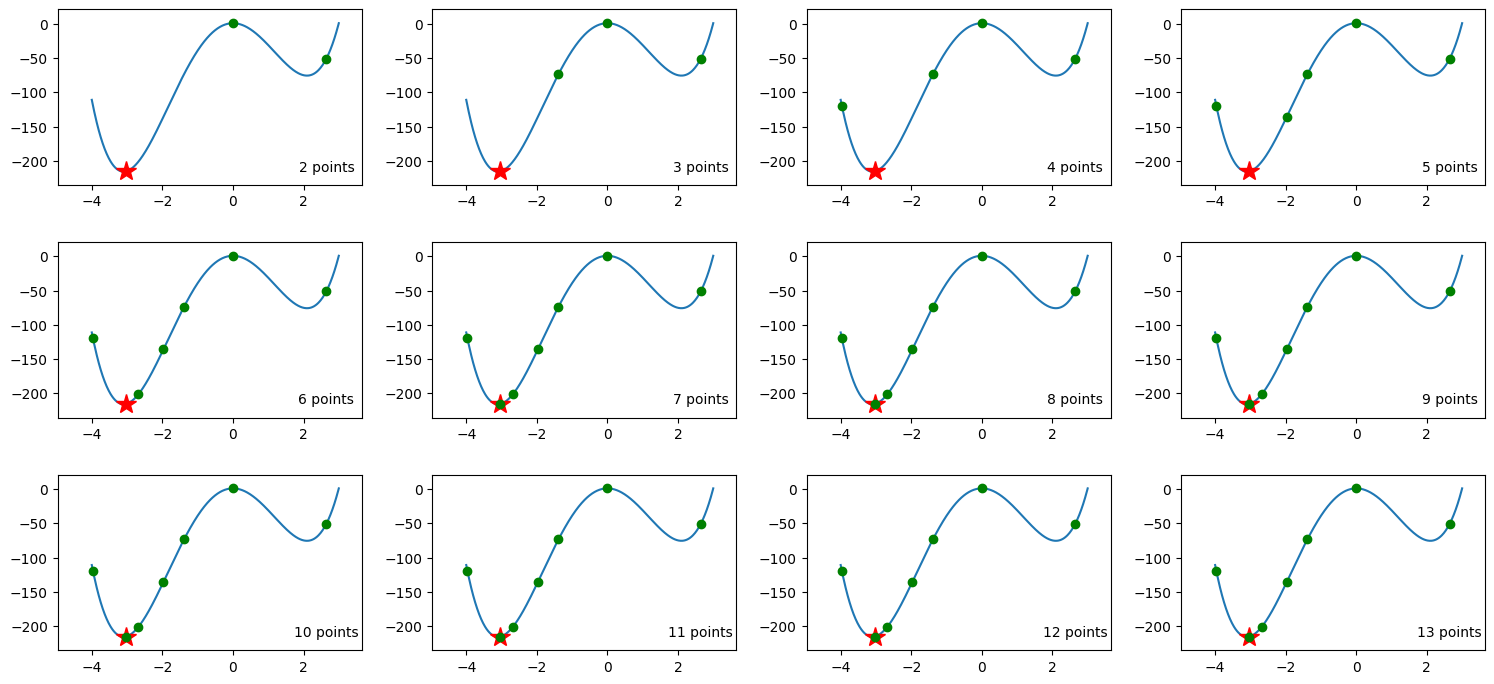

In [576]:

# Set parameters for the graphing windows
x_min = np.min(xVals)-1
x_max = np.max(xVals)+1
y_min = np.min(yVals)-20
y_max = np.max(yVals)+20
x_annotate = x_max-1
y_annotate = y_min+20

# Parameters for the loop to create the graphs
final = len(xVals)-1
step = 1
index = 2

# Create plot object with 12 smaller plots
GD_fig, GD_ax = plt.subplots(ncols=4, nrows=3,figsize=(15,7))
GD_fig.tight_layout(h_pad=2, w_pad=2)

# Fill the plots
for row in range(3):
    for col in range(4):
        GD_ax[row,col].plot(X,f(X))
        GD_ax[row,col].plot(xVals[final],yVals[final],"r*",markersize=15)
        GD_ax[row,col].plot(xVals[:index],yVals[:index],"go")
        GD_ax[row,col].set_xlim(x_min,x_max)
        GD_ax[row,col].set_ylim(y_min,y_max)
        GD_ax[row,col].annotate(str(index)+" points",(x_annotate,y_annotate),horizontalalignment='center')
        index = int(index+step)


# Gradient Descent and Curve Fitting

## Entering Data and Using SciPy

In [577]:
# Here we import the data and assign each column of values to a variable:
# Notice that as columsn are assigned they are made Numpy arrays
df = pd.read_csv('../data/alcohol_calories.csv')
t = np.array(df['Alcohol'])
oz = np.array(df['oz'])
cal = np.array(df['calories'])
# This calculation creates a Numpy array of calories per oz
cal_per_ounce = cal/oz

In [578]:
# These create function representing arbitray linear and quadratic functions
def arb_linear(x,a,b): return a*x+b
def arb_quad(x,a,b,c): return a*(x-b)**2+c

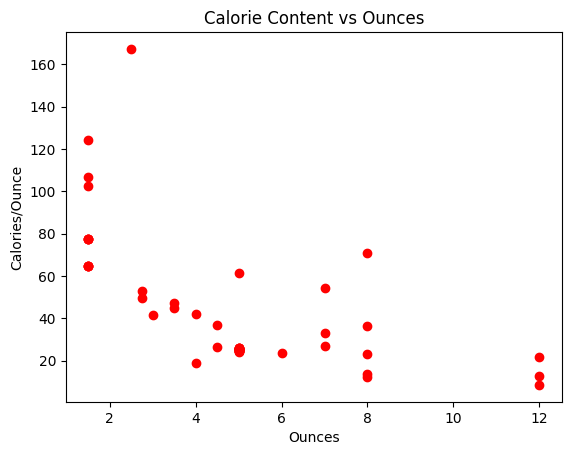

In [579]:
fig,ax = plt.subplots();
scatt_plot = ax.plot(oz,cal_per_ounce,"ro");
ax.set_title("Calorie Content vs Ounces");
ax.set_xlabel('Ounces');
ax.set_ylabel('Calories/Ounce');

In [580]:
lcoef,lcovar=curve_fit(arb_linear, oz, cal_per_ounce)
qcoef,qcovar=curve_fit(arb_quad, oz, cal_per_ounce)

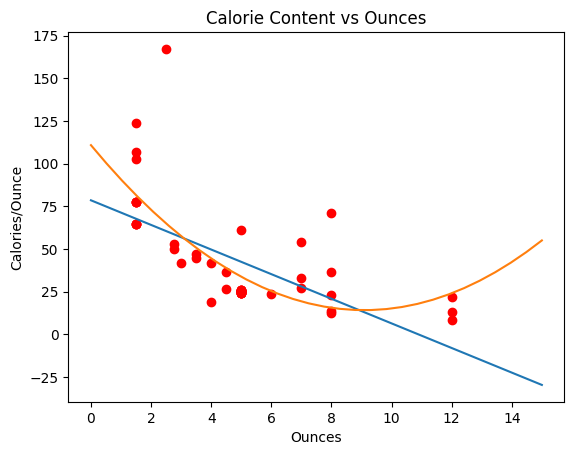

In [581]:
x=np.linspace(0,15,30)
line_approx = ax.plot(x,lcoef[0]*x+lcoef[1]);
quad_approx = ax.plot(x,arb_quad(x,qcoef[0],qcoef[1],qcoef[2]))
fig

## Fitting Data in General
Our goal in fitting a curve, $y=f(x)$, to a set of data is to minimize a sum such as $$\frac{1}{n}\sum_{i=1}^n (y_i-f(x_i))^2,$$ i.e. we are minimizing the sum of the squares or the mean sum of squares in this case.

### Fitting an Line

In [703]:
# Function to find the average square deviation
def ssl(x,y,m,b):
    yp = arb_linear(x,m,b)
    dy = (y-yp)**2
    return np.mean(dy)

# Derivative of the average deviation with respect to a
def dml(x,y,m,b):
    yp = arb_linear(x,m,b)
    dy = y-yp
    return -2*np.mean(dy*(x))

# Derivative of the average deviation with respect to b
def dbl(x,y,m,b):
    yp = m*x+b
    dy = y-yp
    return -2*np.mean(dy)

In [722]:
# Order and set our data as the input and output values
indicies = np.argsort(oz)
x = oz[indicies]
y = cal_per_ounce[indicies]

# Set reasonable starting values
m = [(y[0]-y[-1])/(x[0]-x[-1])]
b = [np.mean(y)]

# Set initial learning rate
dt = 0.01
for i in range(500):
    new_m = m[-1]-dt*dml(x,y,m[-1],b[-1])
    new_b = b[-1]-dt*dbl(x,y,m[-1],b[-1])
    current_ss = ssl(x,y,m[-1],b[-1])
    updated_ss = ssl(x,y,new_m,new_b)
    if updated_ss < current_ss:
        m.append(new_m)
        b.append(new_b)
        dt = 1.01*dt
    else:
        dt = 0.9*dt

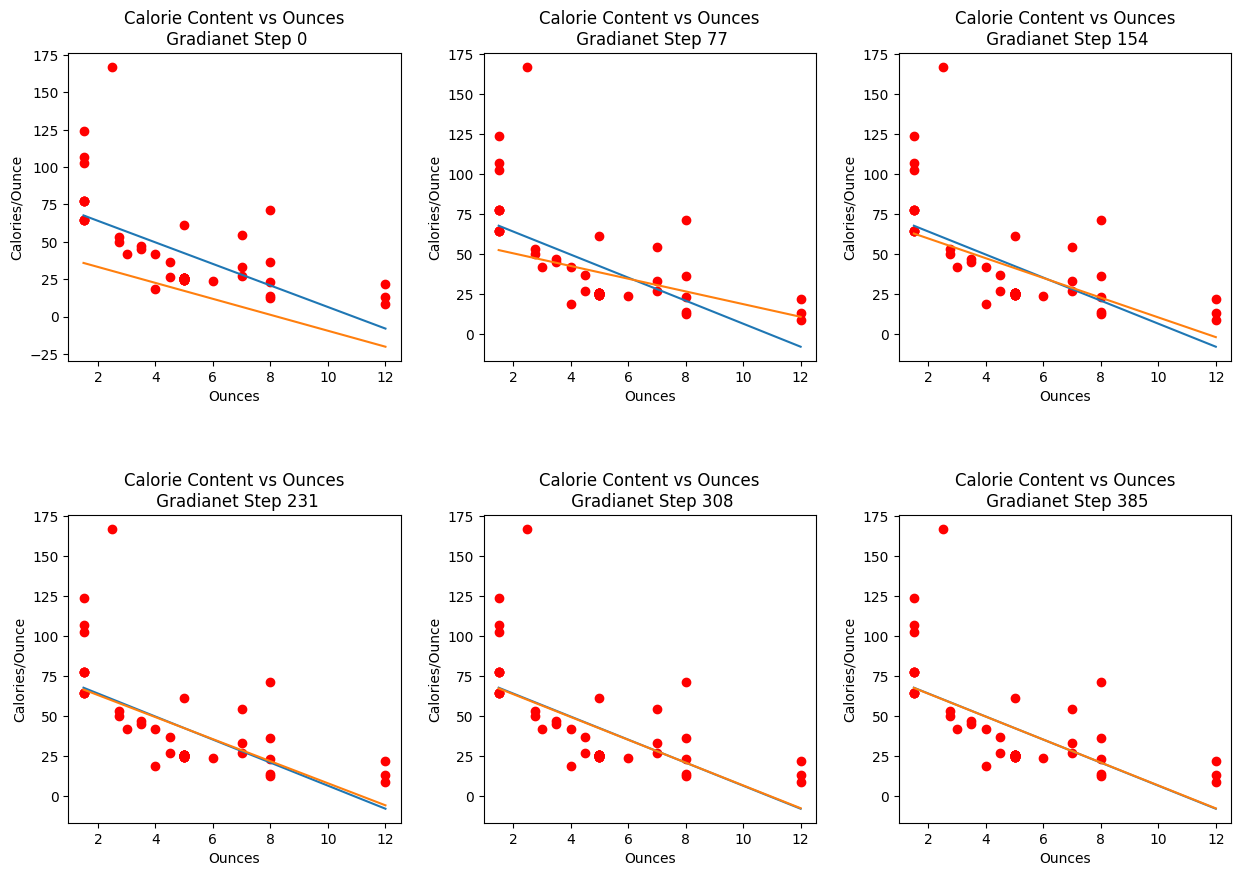

In [723]:
n = 0
step_size = (len(m)-1)//6

fig2,ax2 = plt.subplots(ncols=3,nrows=2,figsize=(15,10));
fig2.subplots_adjust(hspace=0.5,wspace=0.25)
for row in range(2):
    for col in range(3):
        ax2[row,col].plot(oz,cal_per_ounce,"ro");
        ax2[row,col].set_title("Calorie Content vs Ounces\n Gradianet Step %s"%n);
        ax2[row,col].set_xlabel('Ounces');
        ax2[row,col].set_ylabel('Calories/Ounce');
        ax2[row,col].plot(x,lcoef[0]*x+lcoef[1]);
        ax2[row,col].plot(x,m[n]*x+b[n]);
        n += step_size

### Fitting a Quadratic Function

$$f(x)=a(x-b)^2+c$$

$$\frac{d}{da}(y-f(x))^2=\frac{d}{da}\left(y-(a(x-b)^2+c)\right)^2 
= 2\left(y-(a(x-b)^2+c)\right)\frac{d}{da}(-(a(x-b)^2+c))=
-2\left(y-(a(x-b)^2+c)\right)\left((x-b)^2\right)$$

In [588]:
def qSS(x,y,a,b,c):
    yp = arb_quad(x,a,b,c)
    dy = (y-yp)**2
    return np.mean(dy)

def daq(x,y,a,b,c):
    yp = arb_quad(x,a,b,c)
    dy = y-yp
    return -2*np.mean(dy*((x-b)**2))

def dbq(x,y,a,b,c):
    yp = arb_quad(x,a,b,c)
    dy = y-yp
    return -2*np.mean(dy*(2*a*(x-b)*-1))

def dcq(x,y,a,b,c):
    yp = arb_quad(x,a,b,c)
    dy = y-yp
    return -2*np.mean(dy*(1))


In [678]:
indicies = np.argsort(oz)
x = oz[indicies]
y = cal_per_ounce[indicies]

# Picked the initial a, b, and c coefficients so that they
# give a parabola going through 2 exisiting points
b = [np.mean(x)]
c = [np.min(y)]
a = [(y[0]-c[-1])/(x[0]-b[-1])**2]

dt = 10**(-5)

for i in range(12000):
# Calculate the change
    da_temp = dt*daq(x,y,a[-1],b[-1],c[-1])
    db_temp = dt*dbq(x,y,a[-1],b[-1],c[-1])
    dc_temp = dt*dcq(x,y,a[-1],b[-1],c[-1])
# Calculate the new parameters
    temp_a = a[-1]-da_temp
    temp_b = b[-1]-db_temp
    temp_c = c[-1]-dc_temp
# Check for improvement
    current_qSS = qSS(x,y,a[-1],b[-1],c[-1])
    next_qSS = qSS(x,y,temp_a,temp_b,temp_c)
    if next_qSS < current_qSS:
        a.append(temp_a)
        b.append(temp_b)
        c.append(temp_c)
        dt = dt*1.01
    else:
        dt = dt*0.9
        # print("(%s) the new dt is %s"%(i,dt))
print(len(a),"\t:",a[-1],b[-1],c[-1])
print(qcoef)

11004 	: 1.1699186771903722 9.094756386735947 14.050094991792921
[ 1.17012957  9.09068302 14.10069237]


In [679]:
dt

0.0008469497446593193

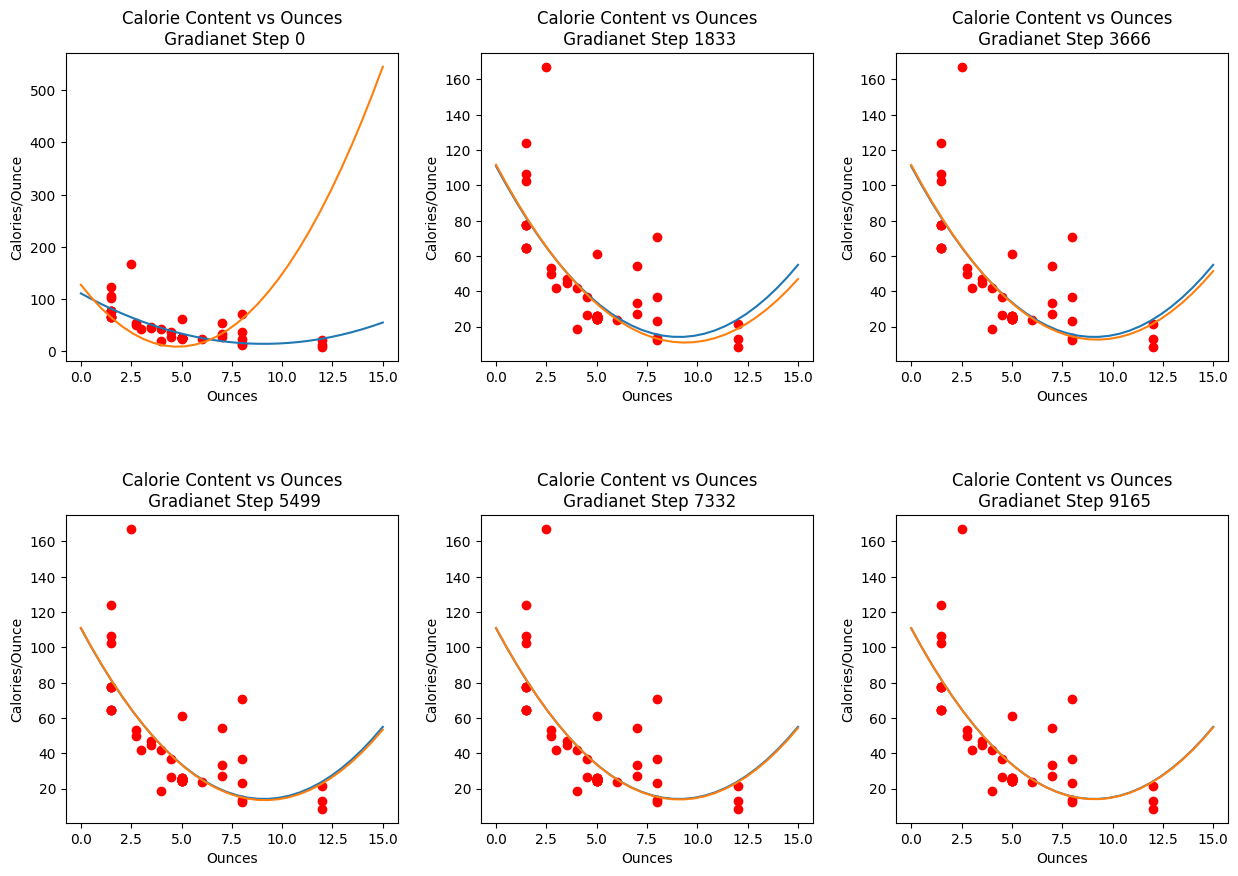

In [680]:
x=np.linspace(0,15,30)
n = 0
step = (len(a)-1)//6


fig3,ax3 = plt.subplots(ncols=3,nrows=2,figsize=(15,10));
fig3.subplots_adjust(hspace=0.5,wspace=0.25)
for row in range(2):
    for col in range(3):
        ax3[row,col].plot(oz,cal_per_ounce,"ro");
        ax3[row,col].set_title("Calorie Content vs Ounces\n Gradianet Step %s"%n);
        ax3[row,col].set_xlabel('Ounces');
        ax3[row,col].set_ylabel('Calories/Ounce');
        ax3[row,col].plot(x,arb_quad(x,qcoef[0],qcoef[1],qcoef[2]));
        ax3[row,col].plot(x,arb_quad(x,a[n],b[n],c[n]));
        n += step

### Fitting an Exponential Function

$$f(x)=k+be^{ax}$$

$$
    \frac{d}{da}(y-f(x))^2
        =\frac{d}{da}\left(y-k-be^{ax}\right)^2 
        = 2\left(y-k-be^{ax}\right)\frac{d}{da}(y-k-be^{ax})
        = -2\left(y-k-be^{ax}\right)\left(xbe^{ax}\right)
$$

In [692]:
def arb_exp1(x,a,b): return b*np.exp(a*x)

In [693]:
def arb_exp2(x,a,b,c): return b*np.exp(a*x)+c

In [694]:
ecoef1,ecovar1=curve_fit(arb_exp1, oz, cal_per_ounce)
ecoef2,ecovar2=curve_fit(arb_exp2, oz, cal_per_ounce)

In [696]:
ecoef1

array([ -0.25965575, 122.71894027])

In [565]:
def dae(x,y,a,b):
    yp = arb_exp(x,a,b)
    dy = y-yp
    return -2*np.mean(dy*(x*yp))

def dbe(x,y,a,b):
    yp = arb_exp(x,a,b)
    dy = y-yp
    return -2*np.mean(dy*(yp/b))


In [569]:
indicies = np.argsort(oz)
x = oz[indicies]
y = cal_per_ounce[indicies]

x0 = x[0]
x1 = x[-1]

y0 = y[0]
y1 = y[-1]

initial_rate = np.log(y1/y0)/(x1-x0)
print(initial_rate)

a = [initial_rate]
b = [y0/np.exp(initial_rate*x0)]

eta = 0.00001

for i in range(200):
# Calculate the change
    da_temp = eta*dae(x,y,a[i],b[i])
    db_temp = eta*dbe(x,y,a[i],b[i])
# Calculate the new parameters
    a.append(a[i]-da_temp)
    b.append(b[i]-db_temp)
print(i,"\t:",a[-1],b[-1])

-0.192326050662246
199 	: -0.16871480112585827 86.29996731752193


In [684]:
ecoef

array([ 5.28652845e-05, -1.36387842e+05,  1.36466320e+05])

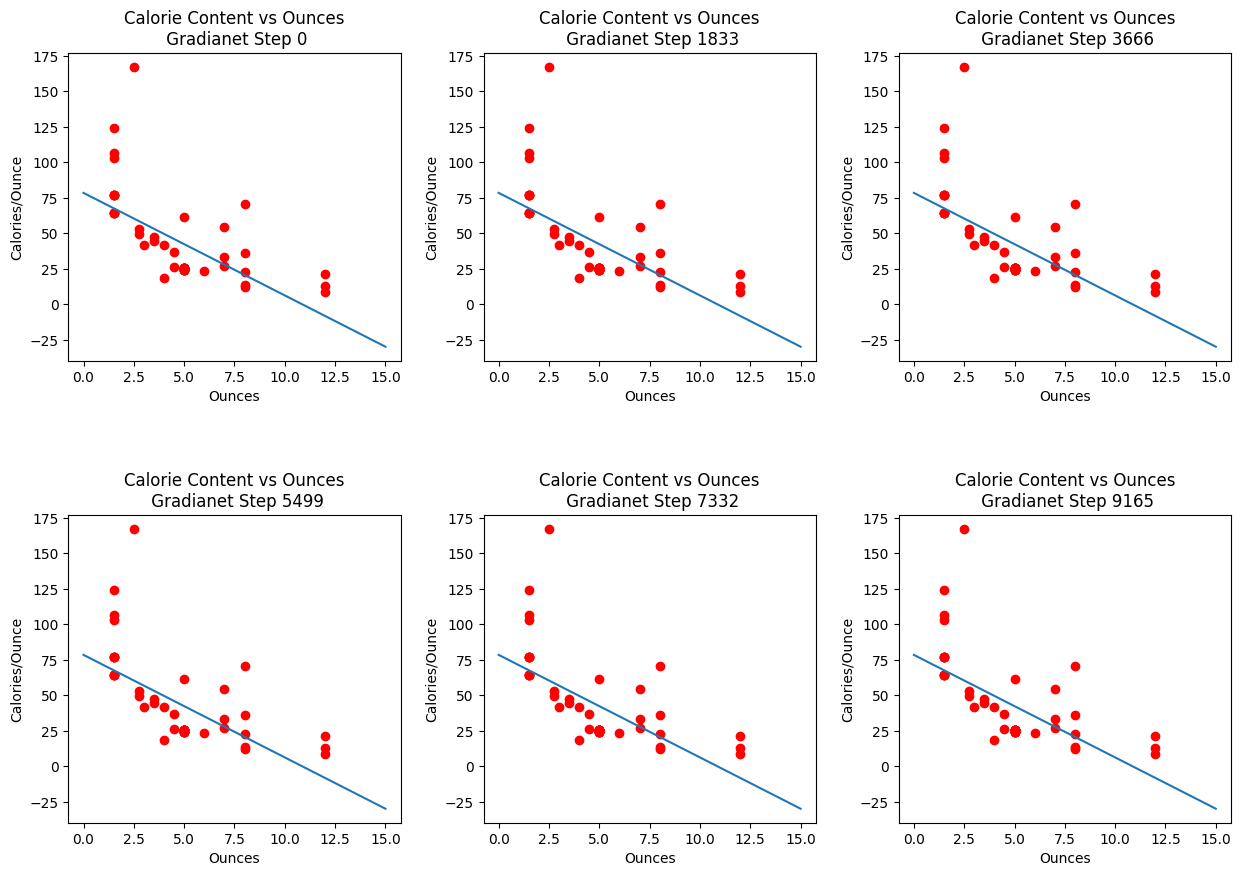

In [697]:
x=np.linspace(0,15,30)
n = 0
step = (len(a)-1)//6


fig4,ax4 = plt.subplots(ncols=3,nrows=2,figsize=(15,10));
fig4.subplots_adjust(hspace=0.5,wspace=0.25)
for row in range(2):
    for col in range(3):
        ax4[row,col].plot(oz,cal_per_ounce,"ro");
        ax4[row,col].set_title("Calorie Content vs Ounces\n Gradianet Step %s"%n);
        ax4[row,col].set_xlabel('Ounces');
        ax4[row,col].set_ylabel('Calories/Ounce');
        ax4[row,col].plot(x,arb_exp(x,ecoef[0],ecoef[1],ecoef[2]));
        # ax4[row,col].plot(x,arb_exp(x,a[n],b[n]));
        n += step